# Sentiment classification using RNN and Bi-LSTM
(SMAI Project)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model   # load saved model
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow.keras.datasets.imdb as imdb
# imdb consisits of 50000 movie reviews each with a positive/negative review

In [ ]:
dataset_path = 'drive/MyDrive/data/IMDB/imdbDataset.csv'
with open(dataset_path, 'r') as file:
  reader = csv.reader(file, delimiter=',')
  row_count = 0
  review_label_dict = {}  # A dictionary having reviews as keys and their labels as values
  
  for row in reader:
    if row_count==0:
      pass
    else:
      val = row.pop()
      key = ','.join(row)
      if val == 'positive':
        review_label_dict[key] = 1
      else:
        review_label_dict[key] = 0
    
    row_count+=1
  print(review_label_dict.values())

dict_values([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 

In [ ]:
# Create a Tokenizer object

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=None, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n_“”’‘' ,
                      lower=True,
                      split=' ',
                      oov_token='<UNK>',
                      document_count=0)

In [ ]:
# Build the Tokenizer vocabulary

tokenizer.fit_on_texts(review_label_dict.keys())

In [ ]:
# Get the tokenizer config as a python dict

tokenizer_config = tokenizer.get_config()
tokenizer_config.keys()

dict_keys(['num_words', 'filters', 'lower', 'split', 'char_level', 'oov_token', 'document_count', 'word_counts', 'word_docs', 'index_docs', 'index_word', 'word_index'])

In [ ]:
# View the word_counts entry

tokenizer_config['word_counts']

'{"one": 52641, "of": 287307, "the": 661683, "other": 17960, "reviewers": 476, "has": 32797, "mentioned": 1076, "that": 135980, "after": 14868, "watching": 9064, "just": 34897, "1": 4208, "oz": 283, "episode": 3124, "you\'ll": 2644, "be": 52910, "hooked": 281, "they": 41588, "are": 57939, "right": 6466, "as": 91056, "this": 149749, "is": 209591, "exactly": 1949, "what": 30342, "happened": 2035, "with": 86699, "me": 21242, "br": 200425, "first": 17420, "thing": 9040, "struck": 278, "about": 33907, "was": 94794, "its": 15876, "brutality": 144, "and": 321988, "unflinching": 31, "scenes": 10397, "violence": 2107, "which": 23223, "set": 4760, "in": 185325, "from": 40224, "word": 1848, "go": 9874, "trust": 602, "not": 60220, "a": 320549, "show": 12265, "for": 86801, "faint": 84, "hearted": 422, "or": 35466, "timid": 48, "pulls": 370, "no": 25033, "punches": 127, "regards": 140, "to": 266076, "drugs": 731, "sex": 3362, "hardcore": 227, "classic": 3525, "use": 3543, "it": 155627, "called": 288

In [ ]:
# Save the word_counts as a python dictionary

import json

word_counts = json.loads(tokenizer_config['word_counts'])

### Word indexes
The mapping from vocabulary word to its corresponding frequency rank is called **word index**

In [ ]:
# View the word_index entry

tokenizer_config['word_index']

'{"<UNK>": 1, "the": 2, "and": 3, "a": 4, "of": 5, "to": 6, "is": 7, "br": 8, "in": 9, "it": 10, "i": 11, "this": 12, "that": 13, "was": 14, "as": 15, "for": 16, "with": 17, "movie": 18, "but": 19, "film": 20, "on": 21, "not": 22, "you": 23, "are": 24, "his": 25, "have": 26, "be": 27, "one": 28, "he": 29, "all": 30, "at": 31, "by": 32, "an": 33, "they": 34, "so": 35, "who": 36, "from": 37, "like": 38, "or": 39, "just": 40, "her": 41, "about": 42, "out": 43, "if": 44, "it\'s": 45, "has": 46, "there": 47, "some": 48, "what": 49, "good": 50, "when": 51, "more": 52, "very": 53, "up": 54, "no": 55, "time": 56, "my": 57, "even": 58, "would": 59, "she": 60, "which": 61, "only": 62, "really": 63, "story": 64, "see": 65, "their": 66, "had": 67, "can": 68, "me": 69, "well": 70, "were": 71, "than": 72, "much": 73, "we": 74, "bad": 75, "get": 76, "been": 77, "do": 78, "great": 79, "will": 80, "other": 81, "also": 82, "into": 83, "people": 84, "because": 85, "him": 86, "how": 87, "first": 88, "most

In [ ]:
# View the index_word entry

tokenizer_config['index_word']

'{"1": "<UNK>", "2": "the", "3": "and", "4": "a", "5": "of", "6": "to", "7": "is", "8": "br", "9": "in", "10": "it", "11": "i", "12": "this", "13": "that", "14": "was", "15": "as", "16": "for", "17": "with", "18": "movie", "19": "but", "20": "film", "21": "on", "22": "not", "23": "you", "24": "are", "25": "his", "26": "have", "27": "be", "28": "one", "29": "he", "30": "all", "31": "at", "32": "by", "33": "an", "34": "they", "35": "so", "36": "who", "37": "from", "38": "like", "39": "or", "40": "just", "41": "her", "42": "about", "43": "out", "44": "if", "45": "it\'s", "46": "has", "47": "there", "48": "some", "49": "what", "50": "good", "51": "when", "52": "more", "53": "very", "54": "up", "55": "no", "56": "time", "57": "my", "58": "even", "59": "would", "60": "she", "61": "which", "62": "only", "63": "really", "64": "story", "65": "see", "66": "their", "67": "had", "68": "can", "69": "me", "70": "well", "71": "were", "72": "than", "73": "much", "74": "we", "75": "bad", "76": "get", "

In [ ]:
# Save word_index and index_word as python dictionaries

index_word = json.loads(tokenizer_config['index_word'])
word_index = json.loads(tokenizer_config['word_index'])

In [ ]:
# This is the total no of distinct words in our corpus of 50000 reviews
max_index_value = max(word_index.values())

In [ ]:
# Tokenize the data

encoded_reviews = tokenizer.texts_to_sequences(review_label_dict.keys())

In [ ]:
# View the first 5 tokenized sentences

encoded_reviews[0:5]

[[28,
  5,
  2,
  81,
  2122,
  46,
  1068,
  13,
  101,
  148,
  40,
  308,
  3189,
  399,
  476,
  27,
  3207,
  34,
  24,
  204,
  15,
  12,
  7,
  625,
  49,
  596,
  17,
  69,
  8,
  8,
  2,
  88,
  149,
  13,
  3231,
  69,
  42,
  3189,
  14,
  93,
  5373,
  3,
  15055,
  136,
  5,
  572,
  61,
  269,
  9,
  204,
  37,
  2,
  660,
  140,
  1739,
  69,
  12,
  7,
  22,
  4,
  121,
  16,
  2,
  7854,
  2339,
  39,
  11427,
  12,
  121,
  2594,
  55,
  5878,
  17,
  5475,
  6,
  1474,
  378,
  39,
  572,
  93,
  7,
  3814,
  9,
  2,
  362,
  358,
  5,
  2,
  660,
  8,
  8,
  10,
  7,
  434,
  3189,
  15,
  13,
  7,
  2,
  11589,
  354,
  6,
  2,
  15976,
  6774,
  2524,
  1073,
  56096,
  10,
  2716,
  1427,
  21,
  23453,
  534,
  33,
  4623,
  2481,
  5,
  2,
  1205,
  118,
  30,
  2,
  7020,
  26,
  2974,
  11903,
  3,
  394,
  56097,
  35,
  16651,
  7,
  22,
  299,
  21,
  2,
  4908,
  7321,
  534,
  7,
  346,
  6,
  107,
  25318,
  8125,
  42485,
  15056,
  5031,
  7855,
  244

In [ ]:
print(len(encoded_reviews))


49582


In [ ]:
# converting list of encoded reviews to numpy array
import numpy as np
review_data = np.array(encoded_reviews)
review_labels = np.array(list(review_label_dict.values()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# review_data.shape
review_labels.shape

(49582,)

In [ ]:
x_train = review_data[:20000]
y_train = review_labels[:20000]
x_val = review_data[20000:30000]
y_val = review_labels[20000:30000]
x_test = review_data[30000:]
y_test = review_labels[30000:]

In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)


(20000,) (10000,) (19582,)


### Padding and truncating the sequence data

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_x_train = pad_sequences(x_train, maxlen=300, padding='post', truncating='pre', value=0.0)
padded_x_val = pad_sequences(x_val, maxlen=300, padding='post', truncating='pre', value=0.0)
padded_x_test = pad_sequences(x_test, maxlen=300, padding='post', truncating='pre', value=0.0)

In [ ]:
padded_x_train.shape

(20000, 300)

In [ ]:
print(type(padded_x_train))

<class 'numpy.ndarray'>


### Creating a masking layer
Masking is done to allow the model differentiate between an actual sequence value and padded sequence value.

In [ ]:
# Masking expects (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)

In [ ]:
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [ ]:
masked_x_train = masking_layer(tf_x_train)

In [ ]:
tf_x_train

<tf.Tensor: shape=(20000, 300, 1), dtype=float32, numpy=
array([[[4.760e+02],
        [2.700e+01],
        [3.207e+03],
        ...,
        [1.260e+02],
        [4.093e+03],
        [4.860e+02]],

       [[4.000e+00],
        [3.930e+02],
        [1.200e+02],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.100e+01],
        [1.910e+02],
        [1.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.290e+02],
        [2.100e+01],
        [9.570e+02],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[2.521e+03],
        [1.404e+03],
        [7.930e+02],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[2.180e+02],
        [5.690e+02],
        [5.630e+02],
        ...,
        [4.000e+00],
        [2.067e+03],
        [6.720e+02]]], dtype=float32)>

In [ ]:
masked_x_train

<tf.Tensor: shape=(20000, 300, 1), dtype=float32, numpy=
array([[[4.760e+02],
        [2.700e+01],
        [3.207e+03],
        ...,
        [1.260e+02],
        [4.093e+03],
        [4.860e+02]],

       [[4.000e+00],
        [3.930e+02],
        [1.200e+02],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.100e+01],
        [1.910e+02],
        [1.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.290e+02],
        [2.100e+01],
        [9.570e+02],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[2.521e+03],
        [1.404e+03],
        [7.930e+02],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[2.180e+02],
        [5.690e+02],
        [5.630e+02],
        ...,
        [4.000e+00],
        [2.067e+03],
        [6.720e+02]]], dtype=float32)>

In [ ]:
# This property gets added after masking. The places where 'false' is given shows the presence of padding and 'true' shows actual sequence data
masked_x_train._keras_mask

<tf.Tensor: shape=(20000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])>

### Embedding layer
This layer allows the network to learn its own representation of each token in a sequence input. \\
The embedding layer takes in a tokenized sequence, and will map each one of those separate tokens to a point in some high-dimensional embedding space.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, GlobalAveragePooling1D, Bidirectional, Masking
'''
The embedding layer takes two required args
1. input dimension(vocab size)(m) - It is the total number of unique tokens or words in the sequence data inputs.
2. embedding dimension (n)- Each of the m separate tokens that are in the input will be mapped into an n dimensional space
We can think of this n dimension as being the embedding space, and each word is going to be mapped somewhere into this space in such a way as to make a useful representation for the network to accomplish its task.
'''
embedding_dim = 32


In [ ]:
import matplotlib.pyplot as plt

def plot_acc(history, ep):
  %matplotlib inline
  plt.style.use('ggplot')
  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1,ep+1)

  plt.figure(figsize=(14,5))
  plt.plot(epochs, acc, marker='.', label='Training accuracy')
  plt.plot(epochs, val_acc, marker='.', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Classification accuracy')
  plt.legend(loc='lower right')
  plt.ylim(0,1);

# **Creating an RNN model**

## 1 Simple RNN + 1 Dense Layers

In [ ]:
RNNmodel = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             SimpleRNN(units=32),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
RNNmodel.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
RNNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          3969056   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 3,971,169
Trainable params: 3,971,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model and save its training history
RNN_history = RNNmodel.fit(padded_x_train, y_train, epochs=20, batch_size=100, validation_data=(padded_x_val,y_val))

Epoch 1/20
200/200 [==============================] - 64s 300ms/step - loss: 0.6682 - accuracy: 0.5814 - val_loss: 0.4561 - val_accuracy: 0.8008
Epoch 2/20
200/200 [==============================] - 60s 299ms/step - loss: 0.3508 - accuracy: 0.8549 - val_loss: 0.3364 - val_accuracy: 0.8573
Epoch 3/20
200/200 [==============================] - 59s 298ms/step - loss: 0.1867 - accuracy: 0.9329 - val_loss: 0.3710 - val_accuracy: 0.8622
Epoch 4/20
200/200 [==============================] - 60s 299ms/step - loss: 0.0951 - accuracy: 0.9722 - val_loss: 0.4091 - val_accuracy: 0.8573
Epoch 5/20
200/200 [==============================] - 60s 299ms/step - loss: 0.0619 - accuracy: 0.9816 - val_loss: 0.4261 - val_accuracy: 0.8620
Epoch 6/20
200/200 [==============================] - 60s 300ms/step - loss: 0.0444 - accuracy: 0.9879 - val_loss: 0.4397 - val_accuracy: 0.8367
Epoch 7/20
200/200 [==============================] - 60s 300ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.6048 - val_ac

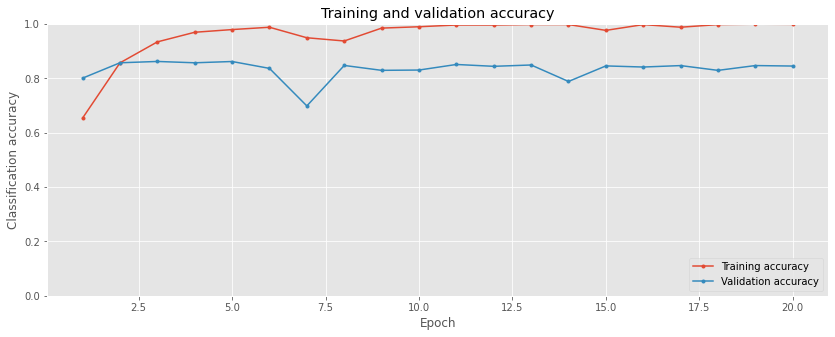

In [ ]:
# Plot training and validation accuracy

plot_acc(RNN_history,20)


In [ ]:
# Test the model after training
RNN_result = RNNmodel.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {RNN_result[0]} - Accuracy: {100*RNN_result[1]}%')

612/612 [==============================] - 24s 39ms/step - loss: 0.8134 - accuracy: 0.8348
Test results - Loss: 0.8134463429450989 - Accuracy: 83.48483443260193%


In [ ]:
RNNmodel.save('drive/MyDrive/models/RNNmodel')

INFO:tensorflow:Assets written to: drive/MyDrive/models/RNNmodel/assets


## 1 Simple RNN + 2 Dense Layers

In [ ]:
RNNmodel1 = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             SimpleRNN(units=32),
                             Dense(units=16, activation='sigmoid'),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
RNNmodel1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
RNNmodel1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          3969056   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,971,681
Trainable params: 3,971,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model and save its training history
RNN_history1 = RNNmodel1.fit(padded_x_train, y_train, epochs=10, batch_size=100, validation_data=(padded_x_val,y_val))

Epoch 1/10
200/200 [==============================] - 61s 300ms/step - loss: 0.6897 - accuracy: 0.5329 - val_loss: 0.6061 - val_accuracy: 0.6952
Epoch 2/10
200/200 [==============================] - 61s 303ms/step - loss: 0.5139 - accuracy: 0.7853 - val_loss: 0.4664 - val_accuracy: 0.7825
Epoch 3/10
200/200 [==============================] - 60s 301ms/step - loss: 0.1994 - accuracy: 0.9380 - val_loss: 0.5048 - val_accuracy: 0.7835
Epoch 4/10
200/200 [==============================] - 60s 300ms/step - loss: 0.0557 - accuracy: 0.9910 - val_loss: 0.5691 - val_accuracy: 0.7901
Epoch 5/10
200/200 [==============================] - 60s 299ms/step - loss: 0.0232 - accuracy: 0.9976 - val_loss: 0.6313 - val_accuracy: 0.7883
Epoch 6/10
200/200 [==============================] - 60s 301ms/step - loss: 0.0104 - accuracy: 0.9996 - val_loss: 0.6751 - val_accuracy: 0.7893
Epoch 7/10
200/200 [==============================] - 60s 299ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 0.6852 - val_ac

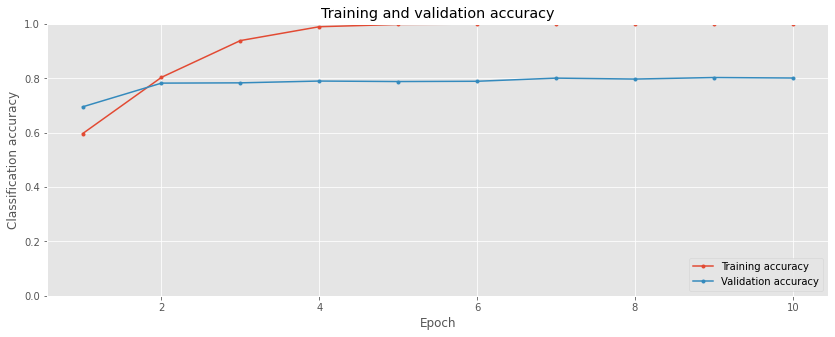

In [ ]:
# Plot training and validation accuracy

plot_acc(RNN_history1,10)


In [ ]:
# Test the model after training
RNN_result1 = RNNmodel1.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {RNN_result1[0]} - Accuracy: {100*RNN_result1[1]}%')

612/612 [==============================] - 24s 39ms/step - loss: 0.7993 - accuracy: 0.7973
Test results - Loss: 0.7993383407592773 - Accuracy: 79.73138689994812%


In [ ]:
RNNmodel1.save('drive/MyDrive/models/RNNmodel1')

INFO:tensorflow:Assets written to: drive/MyDrive/models/RNNmodel1/assets


# **Creating an LSTM model**

## 1 LSTM + 1 Dense Layers

In [ ]:
LSTMmodel = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             LSTM(units=32),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
LSTMmodel.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
LSTMmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          3969056   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,977,409
Trainable params: 3,977,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model and save its training history
LSTM_history = LSTMmodel.fit(padded_x_train, y_train, epochs=20, batch_size=100, validation_data=(padded_x_val,y_val))

Epoch 1/20
200/200 [==============================] - 53s 119ms/step - loss: 0.5861 - accuracy: 0.6745 - val_loss: 0.3307 - val_accuracy: 0.8671
Epoch 2/20
200/200 [==============================] - 23s 113ms/step - loss: 0.2111 - accuracy: 0.9232 - val_loss: 0.3103 - val_accuracy: 0.8729
Epoch 3/20
200/200 [==============================] - 23s 113ms/step - loss: 0.1012 - accuracy: 0.9696 - val_loss: 0.4619 - val_accuracy: 0.8642
Epoch 4/20
200/200 [==============================] - 23s 113ms/step - loss: 0.0600 - accuracy: 0.9833 - val_loss: 0.4298 - val_accuracy: 0.8736
Epoch 5/20
200/200 [==============================] - 22s 112ms/step - loss: 0.0276 - accuracy: 0.9937 - val_loss: 0.4736 - val_accuracy: 0.8645
Epoch 6/20
200/200 [==============================] - 23s 113ms/step - loss: 0.0253 - accuracy: 0.9935 - val_loss: 0.5602 - val_accuracy: 0.8633
Epoch 7/20
200/200 [==============================] - 23s 113ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 0.5754 - val_ac

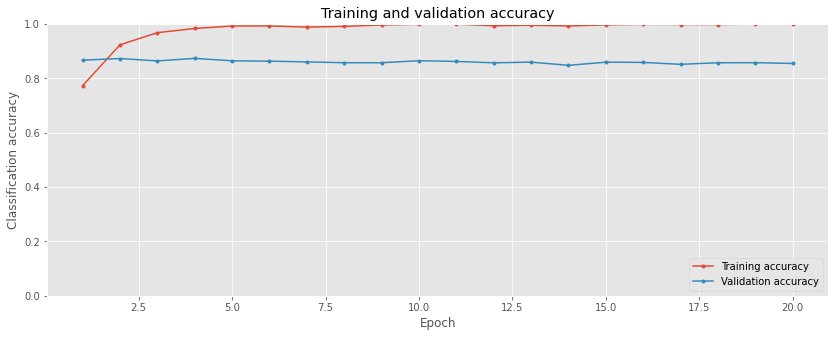

In [ ]:
# Plot training and validation accuracy

plot_acc(LSTM_history,20)


In [ ]:
# Test the model after training
LSTM_result = LSTMmodel.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {LSTM_result[0]} - Accuracy: {100*LSTM_result[1]}%')

612/612 [==============================] - 14s 22ms/step - loss: 0.8702 - accuracy: 0.8524
Test results - Loss: 0.8702269196510315 - Accuracy: 85.24155020713806%


In [ ]:
LSTMmodel.save('drive/MyDrive/models/LSTMmodel')

## 2 LSTM + 2 Dense Layers

In [ ]:
LSTMmodel1 = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             LSTM(units=32, return_sequences=True),
                             LSTM(units=32, return_sequences=False),
                             Dense(units=16, activation='sigmoid'),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
LSTMmodel1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
LSTMmodel1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          3969056   
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 3,986,241
Trainable params: 3,986,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model and save its training history
LSTM_history1 = LSTMmodel1.fit(padded_x_train, y_train, epochs=20, batch_size=100, validation_data=(padded_x_val,y_val))

Epoch 1/20
200/200 [==============================] - 21s 82ms/step - loss: 0.5946 - accuracy: 0.6475 - val_loss: 0.3424 - val_accuracy: 0.8688
Epoch 2/20
200/200 [==============================] - 14s 72ms/step - loss: 0.2340 - accuracy: 0.9236 - val_loss: 0.3406 - val_accuracy: 0.8765
Epoch 3/20
200/200 [==============================] - 14s 71ms/step - loss: 0.1148 - accuracy: 0.9703 - val_loss: 0.3457 - val_accuracy: 0.8683
Epoch 4/20
200/200 [==============================] - 14s 72ms/step - loss: 0.0689 - accuracy: 0.9838 - val_loss: 0.3724 - val_accuracy: 0.8708
Epoch 5/20
200/200 [==============================] - 14s 72ms/step - loss: 0.0454 - accuracy: 0.9903 - val_loss: 0.4368 - val_accuracy: 0.8609
Epoch 6/20
200/200 [==============================] - 14s 72ms/step - loss: 0.0376 - accuracy: 0.9926 - val_loss: 0.4482 - val_accuracy: 0.8589
Epoch 7/20
200/200 [==============================] - 14s 72ms/step - loss: 0.0343 - accuracy: 0.9928 - val_loss: 0.5092 - val_accuracy:

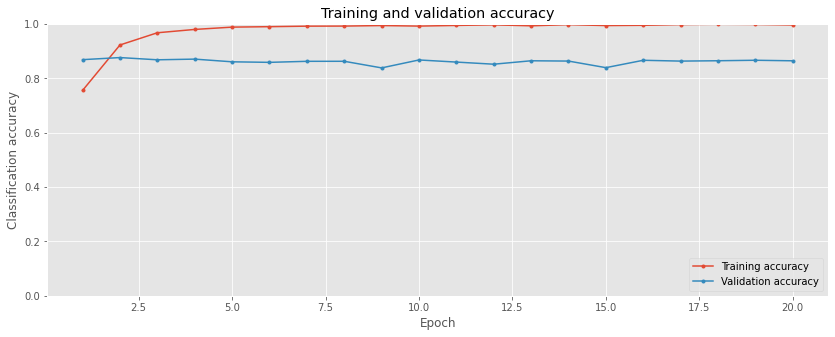

In [ ]:
# Plot training and validation accuracy

plot_acc(LSTM_history1,20)


In [ ]:
# Test the model after training
LSTM_result1 = LSTMmodel1.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {LSTM_result1[0]} - Accuracy: {100*LSTM_result1[1]}%')

612/612 [==============================] - 9s 12ms/step - loss: 0.5943 - accuracy: 0.8595
Test results - Loss: 0.5943109393119812 - Accuracy: 85.95138192176819%


In [ ]:
LSTMmodel1.save('drive/MyDrive/models/LSTMmodel1')

# **Creating a Bidirectional LSTM model**

## 1 Masking + 1 Bi-LSTM + 1 Dense Layers

In [ ]:
BiLSTMmodel = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             Masking(mask_value=0.0),
                             Bidirectional(LSTM(units=32), merge_mode='sum'),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
BiLSTMmodel.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
BiLSTMmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          3969056   
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                16640     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 3,985,729
Trainable params: 3,985,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model and save its training history
BiLSTM_history = BiLSTMmodel.fit(padded_x_train, y_train, epochs=20, batch_size=100, validation_data=(padded_x_val,y_val))

Epoch 1/20
200/200 [==============================] - 46s 202ms/step - loss: 0.5807 - accuracy: 0.6579 - val_loss: 0.2950 - val_accuracy: 0.8774
Epoch 2/20
200/200 [==============================] - 38s 191ms/step - loss: 0.1684 - accuracy: 0.9395 - val_loss: 0.2752 - val_accuracy: 0.8863
Epoch 3/20
200/200 [==============================] - 38s 191ms/step - loss: 0.0837 - accuracy: 0.9761 - val_loss: 0.3161 - val_accuracy: 0.8796
Epoch 4/20
200/200 [==============================] - 38s 191ms/step - loss: 0.0362 - accuracy: 0.9896 - val_loss: 0.4513 - val_accuracy: 0.8763
Epoch 5/20
200/200 [==============================] - 38s 191ms/step - loss: 0.0149 - accuracy: 0.9964 - val_loss: 0.4832 - val_accuracy: 0.8719
Epoch 6/20
200/200 [==============================] - 38s 190ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 0.5656 - val_accuracy: 0.8735
Epoch 7/20
200/200 [==============================] - 38s 191ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.6891 - val_ac

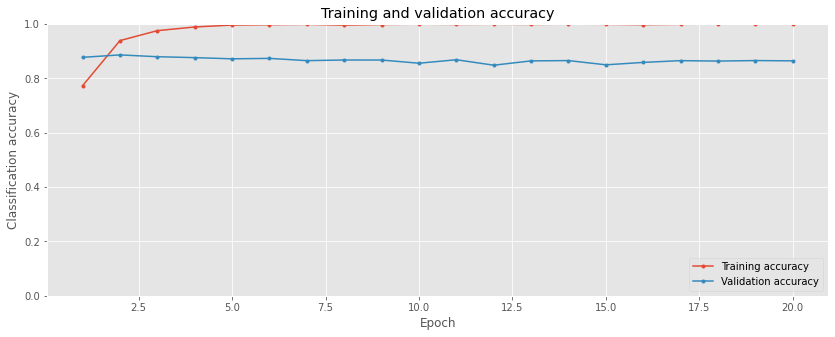

In [ ]:
# Plot training and validation accuracy

plot_acc(BiLSTM_history,20)


In [ ]:
# Test the model after training
BiLSTM_result = BiLSTMmodel.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {BiLSTM_result[0]} - Accuracy: {100*BiLSTM_result[1]}%')

612/612 [==============================] - 30s 43ms/step - loss: 0.9606 - accuracy: 0.8649
Test results - Loss: 0.9606280326843262 - Accuracy: 86.49269938468933%


In [ ]:
BiLSTMmodel.save('drive/MyDrive/models/BiLSTMmodel')

INFO:tensorflow:Assets written to: drive/MyDrive/models/BiLSTMmodel/assets


INFO:tensorflow:Assets written to: drive/MyDrive/models/BiLSTMmodel/assets


## 2 Bi-LSTM + 3 Dense Layers

In [ ]:
BiLSTMmodel1 = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             Bidirectional(LSTM(units=64, return_sequences=True), merge_mode='sum'),
                             Bidirectional(LSTM(units=64)),
                             Dense(units=64, activation='sigmoid'),
                             Dense(units=32, activation='sigmoid'),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
BiLSTMmodel1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
BiLSTMmodel1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          3969056   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          49664     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 4,095,137
Trainable params: 4,095,137
Non-trainable params: 0
____________________________________________

In [ ]:
# Fit the model and save its training history
BiLSTM_history1 = BiLSTMmodel1.fit(padded_x_train, y_train, epochs=20, batch_size=100, validation_data=(padded_x_val,y_val))

Epoch 1/20
200/200 [==============================] - 92s 409ms/step - loss: 0.6686 - accuracy: 0.5773 - val_loss: 0.5918 - val_accuracy: 0.7125
Epoch 2/20
200/200 [==============================] - 77s 383ms/step - loss: 0.5548 - accuracy: 0.7433 - val_loss: 0.5443 - val_accuracy: 0.7457
Epoch 3/20
200/200 [==============================] - 77s 384ms/step - loss: 0.5889 - accuracy: 0.6842 - val_loss: 0.5541 - val_accuracy: 0.7089
Epoch 4/20
200/200 [==============================] - 77s 383ms/step - loss: 0.4072 - accuracy: 0.8245 - val_loss: 0.4021 - val_accuracy: 0.8400
Epoch 5/20
200/200 [==============================] - 77s 383ms/step - loss: 0.1833 - accuracy: 0.9390 - val_loss: 0.3377 - val_accuracy: 0.8676
Epoch 6/20
200/200 [==============================] - 77s 383ms/step - loss: 0.1008 - accuracy: 0.9719 - val_loss: 0.3710 - val_accuracy: 0.8626
Epoch 7/20
200/200 [==============================] - 77s 383ms/step - loss: 0.0575 - accuracy: 0.9871 - val_loss: 0.4914 - val_ac

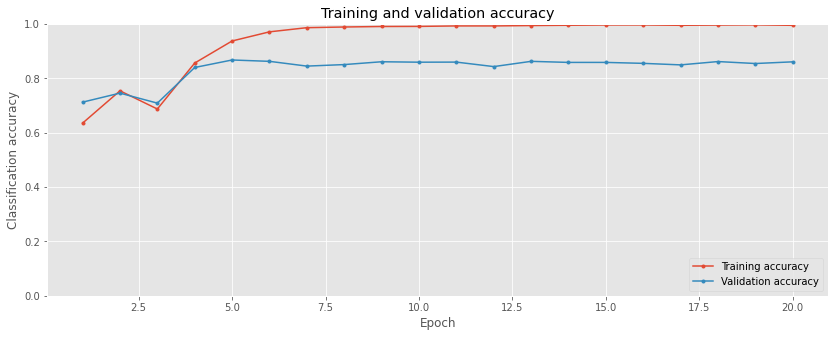

In [ ]:
# Plot training and validation accuracy

plot_acc(BiLSTM_history1,20)


In [ ]:
# Test the model after training
BiLSTM_result1 = BiLSTMmodel1.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {BiLSTM_result1[0]} - Accuracy: {100*BiLSTM_result1[1]}%')

612/612 [==============================] - 59s 89ms/step - loss: 0.6464 - accuracy: 0.8560
Test results - Loss: 0.6464406251907349 - Accuracy: 85.60412526130676%


In [ ]:
BiLSTMmodel1.save('drive/MyDrive/models/BiLSTMmodel1')

INFO:tensorflow:Assets written to: drive/MyDrive/models/BiLSTMmodel1/assets


INFO:tensorflow:Assets written to: drive/MyDrive/models/BiLSTMmodel1/assets


## 1 Masking + 2 Bi-LSTM + 3 Dense Layers

In [ ]:
BiLSTMmodel2 = tf.keras.Sequential([
                             Embedding(input_dim=max_index_value+1, output_dim=32, mask_zero=True),
                             Masking(mask_value=0.0),
                             Bidirectional(LSTM(units=64, return_sequences=True), merge_mode='sum'),
                             Bidirectional(LSTM(units=64)),
                             Dense(units=128, activation='sigmoid'),
                             Dense(units=64, activation='sigmoid'),
                             Dense(units=1, activation='sigmoid')

])

In [ ]:
# Compiling the model 
BiLSTMmodel2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
BiLSTMmodel2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          3969056   
_________________________________________________________________
masking_2 (Masking)          (None, None, 32)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 64)          49664     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
BiLSTMmodel2_checkpoint = ModelCheckpoint(
    'drive/MyDrive/models/BiLSTMmodel2/LSTM.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Fit the model and save its training history
BiLSTM_history2 = BiLSTMmodel2.fit(padded_x_train, y_train, epochs=20, batch_size=100, validation_data=(padded_x_val,y_val), callbacks=[BiLSTMmodel2_checkpoint])

Epoch 1/20
200/200 [==============================] - 33s 121ms/step - loss: 0.6595 - accuracy: 0.5682 - val_loss: 0.3591 - val_accuracy: 0.8623

Epoch 00001: val_accuracy improved from -inf to 0.86230, saving model to drive/MyDrive/models/BiLSTMmodel2/LSTM.h5
Epoch 2/20
200/200 [==============================] - 21s 107ms/step - loss: 0.2663 - accuracy: 0.9031 - val_loss: 0.2918 - val_accuracy: 0.8837

Epoch 00002: val_accuracy improved from 0.86230 to 0.88370, saving model to drive/MyDrive/models/BiLSTMmodel2/LSTM.h5
Epoch 3/20
200/200 [==============================] - 21s 107ms/step - loss: 0.1225 - accuracy: 0.9624 - val_loss: 0.3617 - val_accuracy: 0.8750

Epoch 00003: val_accuracy did not improve from 0.88370
Epoch 4/20
200/200 [==============================] - 22s 108ms/step - loss: 0.0607 - accuracy: 0.9847 - val_loss: 0.4545 - val_accuracy: 0.8392

Epoch 00004: val_accuracy did not improve from 0.88370
Epoch 5/20
200/200 [==============================] - 22s 108ms/step - lo

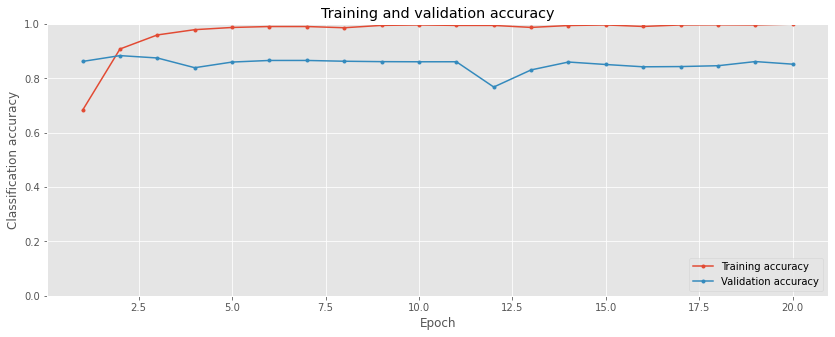

In [ ]:
# Plot training and validation accuracy

plot_acc(BiLSTM_history2,20)


In [ ]:
loaded_BiLSTMmodel2 = load_model('drive/MyDrive/models/BiLSTMmodel2/LSTM.h5')

In [ ]:
# Test the model after training
BiLSTM_result2 = loaded_BiLSTMmodel2.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {BiLSTM_result2[0]} - Accuracy: {100*BiLSTM_result2[1]}%')

612/612 [==============================] - 17s 22ms/step - loss: 0.2884 - accuracy: 0.8831
Test results - Loss: 0.2883839011192322 - Accuracy: 88.31069469451904%


# **Results/Analysis**

Bar Graph plot showing comparison between various RNN-LSTM models for different layers

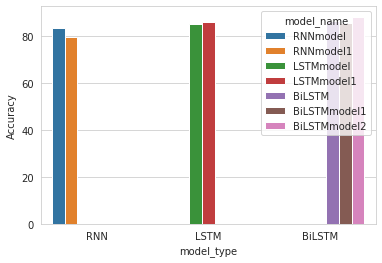

In [ ]:
import seaborn as sns
import pandas as pd
comparison_dict = {'model_name':['RNNmodel', 'RNNmodel1', 'LSTMmodel', 'LSTMmodel1', 'BiLSTM', 'BiLSTMmodel1', 'BiLSTMmodel2'],
                   'model_type':['RNN', 'RNN', 'LSTM', 'LSTM', 'BiLSTM', 'BiLSTM', 'BiLSTM'],
                   'Accuracy':[83.4848, 79.7313, 85.2415, 85.9513, 86.4926, 85.6041, 88.3106]}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df
sns.set_style('whitegrid')
sns.barplot(x='model_type', y='Accuracy', data=comparison_df, hue='model_name')


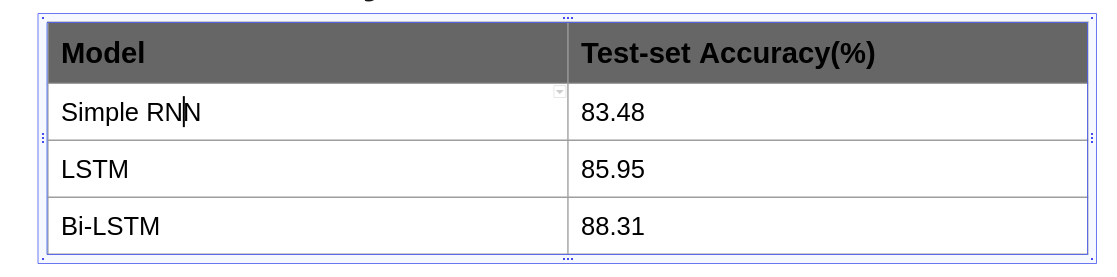

**Using Bi-LSTM model, we were able to achieve test set accuracy of 88.3%(Highest amongst all feedback models)**

# **Comparing with other classifiers**

## Logistic Regression 
LR models can be viewed as special cases of neural nets (i.e, a single layer model, without any hidden layers).

In [ ]:
LRmodel = Sequential([
                      Dense(units=1, activation='sigmoid')
])

LRmodel.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
LRmodel.fit(padded_x_train, y_train, epochs=100, validation_data=(padded_x_val, y_val))

Epoch 1/100
625/625 [==============================] - 2s 2ms/step - loss: 1092241.9421 - accuracy: 0.5040 - val_loss: 1133759.3750 - val_accuracy: 0.4988
Epoch 2/100
625/625 [==============================] - 1s 2ms/step - loss: 1157279.1894 - accuracy: 0.5009 - val_loss: 1867458.7500 - val_accuracy: 0.5123
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: 1177853.6585 - accuracy: 0.4985 - val_loss: 1482132.3750 - val_accuracy: 0.4871
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: 1142326.6563 - accuracy: 0.5095 - val_loss: 1224658.1250 - val_accuracy: 0.5080
Epoch 5/100
625/625 [==============================] - 1s 2ms/step - loss: 1164939.0019 - accuracy: 0.5049 - val_loss: 1108920.0000 - val_accuracy: 0.4975
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 1120015.1071 - accuracy: 0.5122 - val_loss: 1180786.6250 - val_accuracy: 0.5051
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - l

In [ ]:
LR_result = LRmodel.evaluate(padded_x_test, y_test, verbose=True)
print(f'Test results - Loss: {LR_result[0]} - Accuracy: {100*LR_result[1]}%')

612/612 [==============================] - 1s 2ms/step - loss: 1249021.8750 - accuracy: 0.5013
Test results - Loss: 1249021.875 - Accuracy: 50.12766718864441%


## SVM

In [ ]:
from sklearn.svm import SVC 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
svm_model = SVC(kernel='rbf', max_iter=30000, cache_size=500, verbose=True, random_state=53)

In [ ]:
svm_model.fit(padded_x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=500, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=30000, probability=False, random_state=53, shrinking=True,
    tol=0.001, verbose=True)

In [ ]:
svm_predictions = svm_model.predict(padded_x_test)

In [ ]:
print("SVM Accuracy:",metrics.accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.5105709324890205


## Bar-Graph for comparison

Bar Graph for showing comparison between different models used such as svm, logistic regression and Bi-lstm

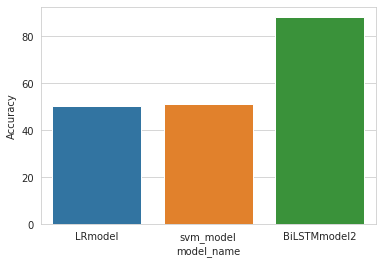

In [ ]:
import seaborn as sns
import pandas as pd
comparison_dict = {'model_name':['LRmodel', 'svm_model','BiLSTMmodel2'],
                   'Accuracy':[50.1276,51.0750,88.3106]}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df
sns.set_style('whitegrid')
sns.barplot(x='model_name', y='Accuracy', data=comparison_df)

# **Conclusion**

RNN with BiLSTM model proves to be the best classifier for sentiment classification on this data
